## CSCA5642:Generative Adversarial Network to create Monet Artworks ##
### This project implements an Generative Adversial Network to transform real-world photos into Monet-style painting. ###

* Author: Alexander Meau  
* Email: alme9155@colorado.edu 
* GitHub: [https://github.com/alme9155/csca-5642-week5/tree/main](https://github.com/alme9155/csca-5642-week5/tree/main)  

## I. Brief Description of the Project and Data ##

This project aims to create a generative adversarial network (GAN) that generates images resembling Monet's paintings.
- **The requirement of this competition is to apply a Generative Adversarial Network (GAN) to generate artwork resembling Monet's paintings.**
- **A Generative Adversarial Network (GAN) is a class of machine learning models consisting of a generator and a discriminator trained to optimize the generation of realistic outputs.**
- Submission will be evaluated by inception score MiFID(Memorization-informed Fréchet Inception Distance)
- MiFID score is a modification of Fréchet Inception Distance (FID).
- The smaller the MiFID value, the better the generated images will be. 

### Dataset: ####
* The dataset contains 4 data directories: "monet_tfrec", "photo_tfrec", "monet_jpg", "photo_jpg"
* The monet_tfrec and monet_jpg directories contain the same painting images
* The photo_tfrec and photo_jpg directories contain the same photos.

|Directory        | Dimension      | Size      | Structure   |
|:----------------|----------------|:----------|:-----------:|
| monet_tfrec | 300   | 256x256 | JPEG |
| photo_tfrec | 300   | 256x256 | JPEG |
| monet_jpg   | 7028  | 256x256 | JPEG |
| photo_jpg   | 7028  | 256x256 | JPEG |


### Competition Rules ###
* Create an Images.zip that contains 7,000-10,000 images sized 256x256.

## II. Exploratory Data Analysis (EDA) ##
- Review the total number of monet paintings in tref format (File Count)
- Review the total number of photos in tfref format (File Count)
- Inspect image dimension (width x height) of monets paintings
- Inspect image dimension (width x height) of photos
- Display sample monet paints and photos

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under t 4ehe input directory

import os

jpg_file_count =0
tfrec_file_count = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"[{dirname}]")

    for filename in filenames:
        if filename.endswith('.jpg'):
            jpg_file_count +=1
            if jpg_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif jpg_file_count == 3:
                print("\t...")
        elif filename.endswith('.tfrec'):
            tfrec_file_count +=1
            if tfrec_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif tfrec_file_count == 3:
                print("\t...")
        else:        
            print(os.path.join(dirname, filename))
    if jpg_file_count > 0:
        print(f"\n\tTotal number of .jpg files in {dirname}: {jpg_file_count}")
        jpg_file_count =0
    if tfrec_file_count > 0:
        print(f"\n\tTotal number of .tfrec files in {dirname}: {tfrec_file_count}")
        tfrec_file_count =0
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[/kaggle/input]
[/kaggle/input/gan-getting-started]
[/kaggle/input/gan-getting-started/monet_jpg]
	/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
	/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/monet_jpg: 300
[/kaggle/input/gan-getting-started/photo_tfrec]
	/kaggle/input/gan-getting-started/photo_tfrec/photo12-352.tfrec
	/kaggle/input/gan-getting-started/photo_tfrec/photo11-352.tfrec
	...

	Total number of .tfrec files in /kaggle/input/gan-getting-started/photo_tfrec: 20
[/kaggle/input/gan-getting-started/photo_jpg]
	/kaggle/input/gan-getting-started/photo_jpg/fb97febc5f.jpg
	/kaggle/input/gan-getting-started/photo_jpg/c54c5368af.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/photo_jpg: 7038
[/kaggle/input/gan-getting-started/monet_tfrec]
	/kaggle/input/gan-getting-started/monet_tfrec/monet12-60.tfrec
	/kaggle/input/gan-getting-started/monet_tfrec/monet16-60.tfrec


Showing 5 random Photo images:


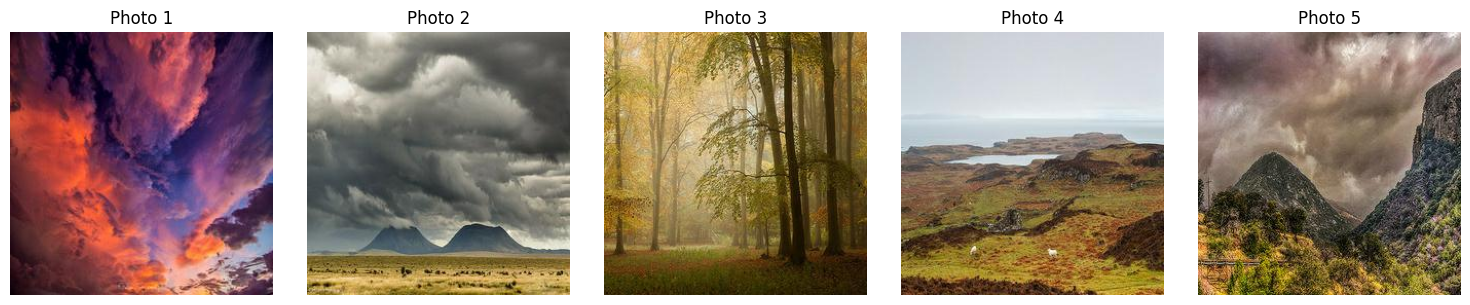

Showing 5 random Monet paintings:


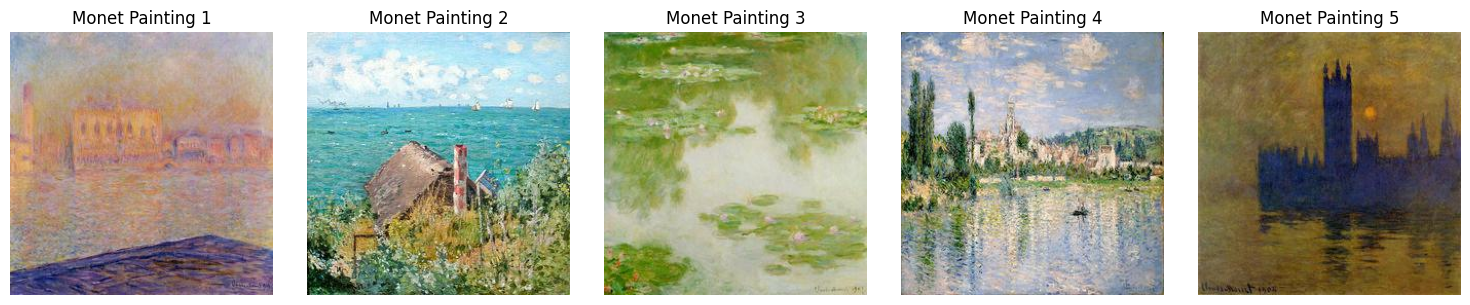

In [2]:
# Display sample files
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from kaggle_datasets import KaggleDatasets

INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

# Show five random photo images
def show_random_photos(folder, label, n=5):
    sample_files = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(sample_files):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label} {i+1}")
    plt.tight_layout()
    plt.show()


# Run both
print("Showing 5 random Photo images:")
show_random_photos(photo_jpg_dir, 'Photo', n=5)
print("Showing 5 random Monet paintings:")
show_random_photos(monet_jpg_dir, 'Monet Painting', n=5)


In [3]:
# examine images in data directories
import os
import cv2
from PIL import Image

# data directory
INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

EXPECTED_SIZE = (256, 256)
EXPECTED_MODE = "RGB"  
PIXEL_RANGE = (-1.0, 1.0)

def examine_files(image_dir):
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_dir, filename)
            with Image.open(img_path) as img:
                # Check size and mode
                if img.size != EXPECTED_SIZE or img.mode != EXPECTED_MODE:
                    print("Needs resizing and preprocessing:")
                    print(f"File: {filename}")
                    print(f"Size: {img.size}, Mode: {img.mode}")
                    break
                    
                image_np = np.asarray(img).astype(np.float32)
                image_np = (image_np / 127.5) - 1.0 
                
                # Check pixel range
                if not (np.min(image_np) >= -1.0 and np.max(image_np) <= 1.0):
                    print("Pixel values in {filename} out of range [-1, 1]:")
                    print(f"File: {filename}")
                    print(f"Pixel min: {np.min(image_np)}, max: {np.max(image_np)}")
                    break
    else:
        print(f"All images in {image_dir} are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]")
        print(f"No further data pre-processing is required for {image_dir}")

examine_files(monet_jpg_dir)
examine_files(photo_jpg_dir)


All images in /kaggle/input/gan-getting-started/monet_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/monet_jpg
All images in /kaggle/input/gan-getting-started/photo_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/photo_jpg


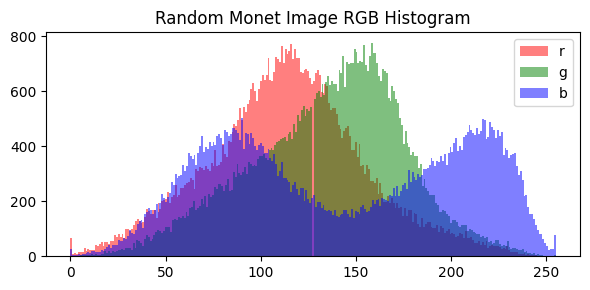

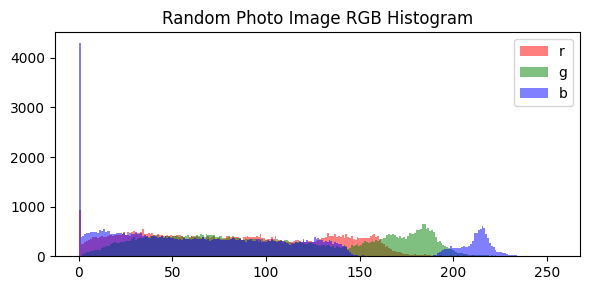

In [4]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def RGB_histogram(img_path, title):
    """Display RGB histogram for a given image."""
    img = Image.open(img_path).convert('RGB')  # Ensure 3-channel RGB
    img_np = np.array(img)
    
    plt.figure(figsize=(6, 3))
    for i, color in enumerate(['r', 'g', 'b']):
        plt.hist(img_np[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=color)
    
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# randomly pick a file for inspection.
def get_random_image_path(directory):
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        raise FileNotFoundError(f"No image files found in {directory}")
    return os.path.join(directory, random.choice(image_files))

# Example directories
INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
random_monet = get_random_image_path(monet_jpg_dir)
random_photo = get_random_image_path(photo_jpg_dir)

RGB_histogram(random_monet, "Random Monet Image RGB Histogram")
RGB_histogram(random_photo, "Random Photo Image RGB Histogram")


### Brief Conclusion of EDA ###

* All image files in the corresponding image directory are already normalized to the required output dimensions 256x256x3 channels.
* No further pre-processing is required before applying an adversarial generative neural network.
  - [ monet_tfrec ] : 300 Monet paintings sized 256x256 with RGB channels in JPEG format
  - [ photo_tfrec ]: 300 Monet paintings sized 256x256 with RGB channels in TFRecord format
  - [ monet_jpg ] : 7028 photos sized 256x256 with RGB channels in JPEG format
  - [ photo_jpg ] : 7028 photos sized 256x256 with RGB channels in TFRecord format

## III. Generative Neural Network Architecture: CycleGAN ##

### Model Description ###
- Following the tutorial on the Kaggle completion, I have decided to use the CycleGAN architecture for this project.
- CycleGAN is a dual DCGAN design (Deep Convolution GAN) to deploy two generators and two discriminators.
- This bi-directional setup will enable translation between domains: A-> B and B -> A.
- - Key Components of CycleGAN are to deploy two generators and two discriminators in the setup.
  - Two Generators:
      - G: X -> Y (e.g., Photo → Monet)
      - F: Y -> X (e.g., Monet → Photo)
  - Two Discriminators:
      - D_Y distinguish real Y from fake Y (G(X)) (e.g. real Monet)
      - D_X distinguish real X from fake X (F(Y)) (e.g. real Photo)
  - By applying a cycle-consistency constraint, it ensures the generated image not only carries Monet's impressionistic style but also looks realistic.
  - Otherwise, the generated image of a zebra might have an extra limb

Ref: [https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook)

In [5]:
# CycleGAN class definition
import tensorflow as tf
from tensorflow.keras import layers, optimizers
import time

class CycleGAN(tf.keras.Model):
    def __init__(self, img_size=256, lambda_cycle=10):
        super(CycleGAN, self).__init__()
        self.img_size = img_size
        self.lambda_cycle = lambda_cycle
        self.loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)     
        self.build_models()
        self.gen_learning_rate=2e-4
        self.disc_learning_rate=2e-4
        print('CycleGAN::Init() complete.')

    def residual_block(self, filters):
        return [
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization()
        ]
    
    def build_generator(self):
        # kernel size: 256 x 256 x RGB channel
        inputs = tf.keras.layers.Input(shape=[self.img_size, self.img_size, 3])
        x = inputs

        # down stack
        for layer in [
            layers.Conv2D(64, 4, strides=2, padding='same', use_bias=False),
            layers.LeakyReLU(),
            layers.Conv2D(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(256, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
        ]:
            x = layer(x)

        # residual block
        for _ in range(6):
            res = x
            for layer in self.residual_block(256):
                res = layer(res)
            x = layers.Add()([x, res])

        # up stack
        for layer in [
            layers.Conv2DTranspose(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2DTranspose(64, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
        ]:
            x = layer(x)

        #last output
        x = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(x)
        return tf.keras.Model(inputs=inputs, outputs=x)

    def build_discriminator(self):
        # discriminator only has down stack with final output
        inputs = layers.Input(shape=[self.img_size, self.img_size, 3])
        x = inputs

        # down stack
        for layer in [
            layers.Conv2D(64, 4, strides=2, padding='same', use_bias=False),
            layers.LeakyReLU(),
            layers.Conv2D(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(256, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(512, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(1, 4, strides=1, padding='same') # Outputs BinaryCrossentropy(from_logits=True).
        ]:
            x = layer(x)            
        return tf.keras.Model(inputs=inputs, outputs=x)

    def build_models(self):
        self.gen_photo_to_monet = self.build_generator()
        self.gen_monet_to_photo = self.build_generator()
        self.disc_photo = self.build_discriminator()
        self.disc_monet = self.build_discriminator()

    def generator_loss(self, discriminator_output):
        return self.loss_obj(tf.ones_like(discriminator_output), discriminator_output)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.loss_obj(tf.ones_like(real_output), real_output)
        fake_loss = self.loss_obj(tf.zeros_like(fake_output), fake_output)
        return (real_loss + fake_loss) * 0.5

    def cycle_loss_fn(self, real_image, cycled_image, lambda_weight):
        return lambda_weight * tf.reduce_mean(tf.abs(real_image - cycled_image))

    def identity_loss_fn(self, real_image, same_image, lambda_weight):
        return 0.5 * lambda_weight * tf.reduce_mean(tf.abs(real_image - same_image))    
    
    def compile(self, gen_learning_rate=None, disc_learning_rate=None):
        super().compile()
        gen_lr = gen_learning_rate if gen_learning_rate is not None else self.gen_learning_rate
        disc_lr = disc_learning_rate if disc_learning_rate is not None else self.disc_learning_rate
        self.gen_photo_to_monet_optimizer = optimizers.Adam(gen_lr, beta_1=0.5)
        self.gen_monet_to_photo_optimizer = optimizers.Adam(gen_lr, beta_1=0.5)
        self.disc_photo_optimizer = optimizers.Adam(disc_lr, beta_1=0.5)
        self.disc_monet_optimizer = optimizers.Adam(disc_lr, beta_1=0.5)          
        print('CycleGAN::compile() complete.')

    @tf.function
    def train_step(self, batch_data):
        real_photo, real_monet = batch_data

        with tf.GradientTape(persistent=True) as tape:
            # Generate images
            fake_monet = self.gen_photo_to_monet(real_photo, training=True)
            fake_photo = self.gen_monet_to_photo(real_monet, training=True)
            cycled_photo = self.gen_monet_to_photo(fake_monet, training=True)
            cycled_monet = self.gen_photo_to_monet(fake_photo, training=True)
            same_photo = self.gen_monet_to_photo(real_photo, training=True)
            same_monet = self.gen_photo_to_monet(real_monet, training=True)

            # Discriminator outputs
            disc_real_photo = self.disc_photo(real_photo, training=True)
            disc_fake_photo = self.disc_photo(fake_photo, training=True)
            disc_real_monet = self.disc_monet(real_monet, training=True)
            disc_fake_monet = self.disc_monet(fake_monet, training=True)

            # Generator losses
            gen_photo_to_monet_loss = self.generator_loss(disc_fake_monet)
            gen_monet_to_photo_loss = self.generator_loss(disc_fake_photo)
            cycle_loss = tf.reduce_mean(tf.abs(real_photo - cycled_photo)) + tf.reduce_mean(tf.abs(real_monet - cycled_monet))
            identity_loss = tf.reduce_mean(tf.abs(real_photo - same_photo)) + tf.reduce_mean(tf.abs(real_monet - same_monet))

            total_gen_photo_to_monet_loss = gen_photo_to_monet_loss + self.lambda_cycle * cycle_loss + 0.5 * self.lambda_cycle * identity_loss
            total_gen_monet_to_photo_loss = gen_monet_to_photo_loss + self.lambda_cycle * cycle_loss + 0.5 * self.lambda_cycle * identity_loss

            # Discriminator losses
            disc_photo_loss = self.discriminator_loss(disc_real_photo, disc_fake_photo)
            disc_monet_loss = self.discriminator_loss(disc_real_monet, disc_fake_monet)

        # Gradients
        grads_gen_photo_to_monet = tape.gradient(total_gen_photo_to_monet_loss, self.gen_photo_to_monet.trainable_variables)
        grads_gen_monet_to_photo = tape.gradient(total_gen_monet_to_photo_loss, self.gen_monet_to_photo.trainable_variables)
        grads_disc_photo = tape.gradient(disc_photo_loss, self.disc_photo.trainable_variables)
        grads_disc_monet = tape.gradient(disc_monet_loss, self.disc_monet.trainable_variables)

        # Clip gradients
        grads_gen_photo_to_monet = [tf.clip_by_norm(g, 1.0) for g in grads_gen_photo_to_monet]
        grads_gen_monet_to_photo = [tf.clip_by_norm(g, 1.0) for g in grads_gen_monet_to_photo]
        grads_disc_photo = [tf.clip_by_norm(g, 1.0) for g in grads_disc_photo]
        grads_disc_monet = [tf.clip_by_norm(g, 1.0) for g in grads_disc_monet]

        # Apply gradients
        self.gen_photo_to_monet_optimizer.apply_gradients(zip(grads_gen_photo_to_monet, self.gen_photo_to_monet.trainable_variables))
        self.gen_monet_to_photo_optimizer.apply_gradients(zip(grads_gen_monet_to_photo, self.gen_monet_to_photo.trainable_variables))
        self.disc_photo_optimizer.apply_gradients(zip(grads_disc_photo, self.disc_photo.trainable_variables))
        self.disc_monet_optimizer.apply_gradients(zip(grads_disc_monet, self.disc_monet.trainable_variables))

        del tape
        return {
            'photo_gen_loss': total_gen_photo_to_monet_loss,
            'monet_gen_loss': total_gen_monet_to_photo_loss,
            'photo_disc_loss': disc_photo_loss,
            'monet_disc_loss': disc_monet_loss
        }

    def fit(self, photo_dataset, monet_dataset, epochs=20):
        steps_per_epoch = sum(1 for _ in photo_dataset)
        if steps_per_epoch == 0:
            raise ValueError("photo_dataset is empty or has unknown size.")

        self.loss_history = {
            'photo_gen_loss': [],
            'monet_gen_loss': [],
            'photo_disc_loss': [],
            'monet_disc_loss': []
        }
        
        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")
            progbar = tf.keras.utils.Progbar(steps_per_epoch, stateful_metrics=[
                'photo_gen_loss', 'monet_gen_loss', 'photo_disc_loss', 'monet_disc_loss'
            ])

            epoch_losses = {
                'photo_gen_loss': 0.0,
                'monet_gen_loss': 0.0,
                'photo_disc_loss': 0.0,
                'monet_disc_loss': 0.0
            }
    
            # Zip datasets and run training steps
            for step, (image_photo, image_monet) in enumerate(tf.data.Dataset.zip((photo_dataset, monet_dataset))):
                losses = self.train_step((image_photo, image_monet))

                # Accumulate total
                for k in epoch_losses:
                    epoch_losses[k] += float(losses[k])
                
                progbar.update(step + 1, [
                    ('photo_gen_loss', float(losses['photo_gen_loss'])),
                    ('monet_gen_loss', float(losses['monet_gen_loss'])),
                    ('photo_disc_loss', float(losses['photo_disc_loss'])),
                    ('monet_disc_loss', float(losses['monet_disc_loss']))
                ])
                
            for k in self.loss_history:
                self.loss_history[k].append(epoch_losses[k] / steps_per_epoch)
        print("CycleGAN::Training() complete.")
print('CycleGAN Model Defined..')

2026-02-19 07:13:54.513415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771485234.686085      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771485234.738270      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771485235.163301      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771485235.163340      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771485235.163343      55 computation_placer.cc:177] computation placer alr

CycleGAN Model Defined..


## IV. Model Training ##

* Load Monet and Photo Dataset from jpg files.
* Dataset has 7000 photo and 300 images in jpg format, but only 20 photos and 5 images in tensorflow native tfref format.
* Train CycleGAN model with loaded jpg dataset
 
Ref: [https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook)

In [9]:
# load dataset
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import os
import matplotlib.pyplot as plt

IMAGE_SIZE = [256, 256]
BATCH_SIZE = 1 #no batch normalization for CycleGAN

# Get GCS path for TFRecord data
GCS_PATH = KaggleDatasets().get_gcs_path('gan-getting-started')

INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')

def decode_jpg(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMAGE_SIZE)
    image = (tf.cast(image, tf.float32) / 127.5) - 1 
    return image

def load_jpg_dataset(image_dir):
    jpg_files = tf.data.Dataset.list_files(os.path.join(image_dir, '*.jpg'), shuffle=True)
    dataset = (jpg_files
               .map(decode_jpg, num_parallel_calls=tf.data.AUTOTUNE)
               .cache()
               .shuffle(1024)
               .batch(BATCH_SIZE)
               .prefetch(tf.data.AUTOTUNE))
    return dataset

def load_dataset(tfrecord_paths):
    return (tf.data.TFRecordDataset(tfrecord_paths)
            .map(read_tfrecord, num_parallel_calls=tf.data.AUTOTUNE)
            .cache()
            .shuffle(1024)
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE))


monet_dataset = load_jpg_dataset(monet_jpg_dir)
photo_dataset = load_jpg_dataset(photo_jpg_dir)
monet_file_count = len(os.listdir(monet_jpg_dir))
photo_file_count = len(os.listdir(photo_jpg_dir))

print(f"Monet Dataset has {monet_file_count} files.")
# photo_dataset = load_dataset(photo_tfrec_path)
print(f"Photo Dataset has {photo_file_count} files."  )
print('Monet and Photo Dataset loaded....')

Monet Dataset has 300 files.
Photo Dataset has 7038 files.
Monet and Photo Dataset loaded....


In [10]:
import tensorflow as tf
import os
import zipfile
import shutil
import numpy as np
import PIL.Image
import random
import matplotlib.pyplot as plt

IMG_SIZE = 256
EPOCHS = 25
OUTPUT_DIR = "../generated_images"

model = CycleGAN(img_size=IMG_SIZE)
model.compile()
history = model.fit(photo_dataset, monet_dataset, epochs=EPOCHS)
print("Model Training complete.")

CycleGAN::Init() complete.
CycleGAN::compile() complete.

Epoch 1/25


I0000 00:00:1771485560.610500     125 cuda_dnn.cc:529] Loaded cuDNN version 91002


 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:35 139ms/step - photo_gen_loss: 7.8917 - monet_gen_loss: 7.2994 - photo_disc_loss: 0.6138 - monet_disc_loss: 0.6542
Epoch 2/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:31 138ms/step - photo_gen_loss: 9.1506 - monet_gen_loss: 9.1372 - photo_disc_loss: 0.9155 - monet_disc_loss: 0.6205
Epoch 3/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:31 138ms/step - photo_gen_loss: 8.3606 - monet_gen_loss: 7.6150 - photo_disc_loss: 0.6698 - monet_disc_loss: 0.4900 
Epoch 4/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:32 138ms/step - photo_gen_loss: 8.0781 - monet_gen_loss: 7.9856 - photo_disc_loss: 0.5009 - monet_disc_loss: 0.4397
Epoch 5/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:30 138ms/step - photo_gen_loss: 9.6484 - monet_gen_loss: 10.0750 - photo_disc_loss: 0.3555 - monet_disc_loss: 0.7085
Epoch 6/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:27 138ms/step - photo_gen_loss: 5.5744 - monet_gen_loss: 5.5107 - photo_disc_loss: 0.6912 - monet_disc_loss: 0.6806
Epoch 7/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 1

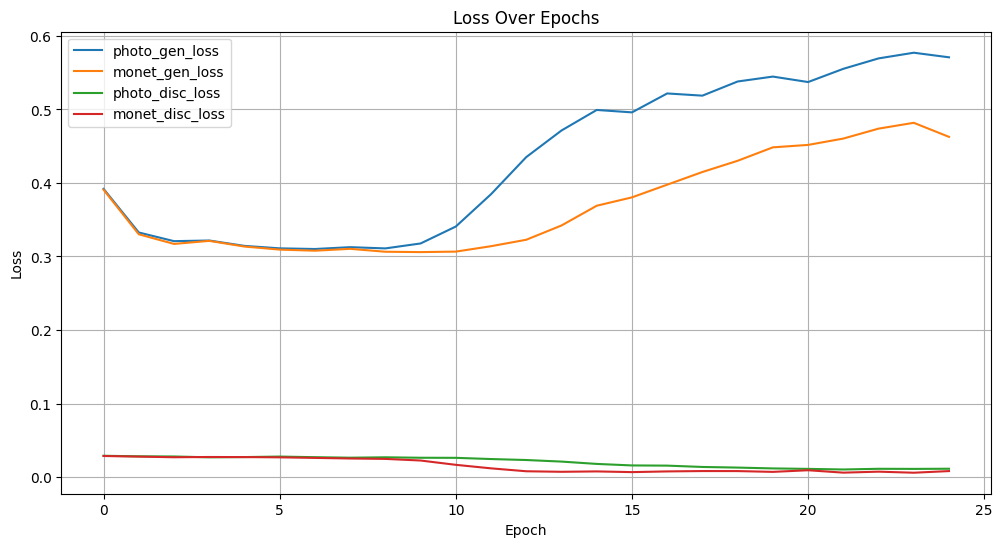

In [11]:
import matplotlib.pyplot as plt

# plot loss over training epoch
plt.figure(figsize=(12, 6))

for k, v in model.loss_history.items():
    plt.plot(v, label=k)

plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## VI. Results and Analysis before Hyper-parameter Tuning ##

Over the course of 25 training epochs, the training shows moderate fluctuation while using CycleGAN to convert photos into Monet-style paintings:
### Generator Loss ###
* Epoch 1-5: A sharp early drop in generator loss indicates successful initial learning. The generator is getting better at fooling the discriminator.
* Epoch 6-25: Noticeable fluctuations are observed, with spikes occurring around Epochs 10, 15, and 20—suggesting instability in adversarial dynamics.

### Discriminator Loss ###
* The discriminator loss generally declines over time, with relatively minor spikes.
* The lowest loss values appear around Epochs 8 and 9, indicating the discriminator's strongest performance during training.

## VII. Hyper-parameter Tuning with adjusting Lambda value. ###

* CycleGAN use two GAN model photo -> Monet, and Monet -> Photo.
* Lambda value in CycleGAN is a weighting factor that controls the range of cycle-consistency loss.

Three lambdha values will be evaluted:
- 5
- 10
- 15

In [12]:
### Sub-class with custom fit() method to examine lambda hyper-parameter.
import tensorflow as tf
from tensorflow.keras import optimizers, utils
import time


class CustomCycleGANLambdaTuning(CycleGAN):
    def fit(self, photo_dataset, monet_dataset, epochs=25):
        # Determine steps per epoch safely
        cardinality = tf.data.experimental.cardinality(photo_dataset)
        if cardinality == tf.data.INFINITE_CARDINALITY or cardinality == tf.data.UNKNOWN_CARDINALITY:
            steps_per_epoch = 300  # Fallback default value
        else:
            steps_per_epoch = cardinality.numpy()

        loss_history = {
            'photo_gen_loss': [],
            'monet_gen_loss': [],
            'photo_disc_loss': [],
            'monet_disc_loss': []
        }

        for epoch in range(epochs):
            print(f"\nEpoch {epoch + 1}/{epochs}")
            progbar = utils.Progbar(steps_per_epoch, stateful_metrics=[
                'photo_gen_loss', 'monet_gen_loss', 'photo_disc_loss', 'monet_disc_loss'])

            epoch_losses = {
                'photo_gen_loss': 0.0,
                'monet_gen_loss': 0.0,
                'photo_disc_loss': 0.0,
                'monet_disc_loss': 0.0
            }

            for step, (image_photo, image_monet) in enumerate(tf.data.Dataset.zip((photo_dataset, monet_dataset))):
                losses = self.train_step((image_photo, image_monet))

                # Accumulate epoch loss
                for key in epoch_losses:
                    epoch_losses[key] += float(losses[key])

                progbar.update(step + 1, [
                    ('photo_gen_loss', float(losses['photo_gen_loss'])),
                    ('monet_gen_loss', float(losses['monet_gen_loss'])),
                    ('photo_disc_loss', float(losses['photo_disc_loss'])),
                    ('monet_disc_loss', float(losses['monet_disc_loss']))
                ])

                if step + 1 >= steps_per_epoch:
                    break

            # Store average loss per epoch
            for key in loss_history:
                loss_history[key].append(epoch_losses[key] / steps_per_epoch)

        print("Training complete.")
        return loss_history


lambda_list = [5, 10, 15]
EPOCHS = 10
results = {}

for lambda_value in lambda_list:
    print(f"\nTraining CycleGAN with lambda cycle = {lambda_value}")
    model = CustomCycleGANLambdaTuning(img_size=256, lambda_cycle=lambda_value)
    model.compile()
    loss_history = model.fit(photo_dataset, monet_dataset, epochs=EPOCHS)
    results[f'lambda_{lambda_value}'] = loss_history['photo_gen_loss']


Training CycleGAN with lambda cycle = 5
CycleGAN::Init() complete.
CycleGAN::compile() complete.

Epoch 1/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:33 139ms/step - photo_gen_loss: 4.4234 - monet_gen_loss: 4.3481 - photo_disc_loss: 0.7955 - monet_disc_loss: 0.6287
Epoch 2/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:29 138ms/step - photo_gen_loss: 4.6077 - monet_gen_loss: 4.0595 - photo_disc_loss: 0.7291 - monet_disc_loss: 0.8271
Epoch 3/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:32 138ms/step - photo_gen_loss: 4.3317 - monet_gen_loss: 4.0181 - photo_disc_loss: 0.9311 - monet_disc_loss: 0.9171
Epoch 4/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:31 138ms/step - photo_gen_loss: 4.3257 - monet_gen_loss: 4.5471 - photo_disc_loss: 0.6967 - monet_disc_loss: 0.8190
Epoch 5/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:31 138ms/step - photo_gen_loss: 3.8900 - monet_gen_loss: 4.2322 - photo_disc_loss: 0.4596 - monet_disc_loss: 0.5830
Epoch 6/10
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:34 139ms/step - photo_gen_loss: 3.8609 - monet_gen_

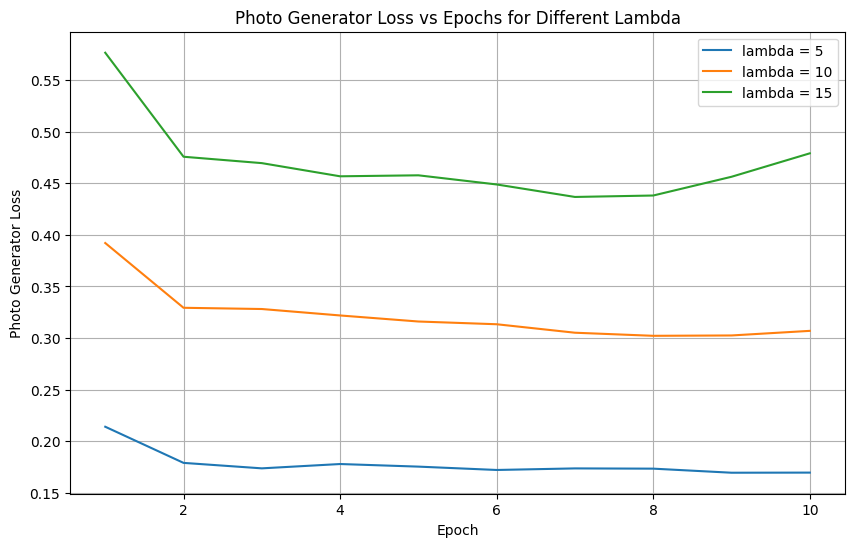

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for lambda_value in lambda_list:
    key = f'lambda_{lambda_value}'
    if key in results:
        plt.plot(range(1, len(results[key]) + 1), results[key], label=f'lambda = {lambda_value}')
    else:
        print(f"Warning: {key} not found in results.")

plt.title('Photo Generator Loss vs Epochs for Different Lambda')
plt.xlabel('Epoch')
plt.ylabel('Photo Generator Loss')
plt.legend()
plt.grid(True)
plt.show()

## VIII. Results and Interprtation on Lambda hyper-parameter Tuning ##
- Conclusion: **Lambda value =10 remains the best option balance image stylization and realism.**
### Result ###


### Interpretation ###
- A small lambda value places less emphasis on reconstruction consistency. This allows the model to produce images that look more like Monet paintings stylistically, but the object structure may become less realistic.
- A large lambda value, on the other hand, places greater emphasis on reconstruction consistency. This encourages the model to preserve object structure more faithfully, but the resulting images may appear less stylized and closer to the original input.

## IX. Hyper-parameter Tuning with Early Stopping Interpretation ###
**Based upon previous learning loss statistics, early-stopping with patience value =3 will return best result.**

* Lowest combined generator loss (photo + monet) occurs at Epoch 11: 5.9172 + 5.8281 = 11.7453
* After Epoch 11, generator loss increase again:
  - Epoch 12: 17.07 (big spike)
  - Epoch 13: 14.94 (still higher than 11.7453)
  - Epoch 14: 12.56 (still higher than 11.7453)
  - Epoch 15: 18.2 (another spike)
* Thus, early stopping with patience value = 3 would allow
  - Allow small fluctuation but still prevent overfitting of memorization of training photo.

## X. Prepare Best model for competition submission ##
Best model configuration
- lambda =10
- Early stopping with patience value =3

In [14]:
import tensorflow as tf
import time
from tensorflow.keras import optimizers, layers
import os
import shutil

class CustomCycleGANFinalSubmission(CycleGAN):
    def fit(self, photo_dataset, monet_dataset, epochs=25, patience=3, weight_photo=0.9, weight_monet=0.1):
        cardinality = tf.data.experimental.cardinality(photo_dataset)
        if cardinality == tf.data.INFINITE_CARDINALITY or cardinality == tf.data.UNKNOWN_CARDINALITY:
            steps_per_epoch = 300
        else:
            steps_per_epoch = cardinality.numpy()

        best_loss = float('inf')
        wait = 0

        epoch_loss_history = {
            'photo_gen_loss': [],
            'monet_gen_loss': [],
            'photo_disc_loss': [],
            'monet_disc_loss': [],
            'avg_total_gen_loss': []
        }

        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs}")
            progbar = tf.keras.utils.Progbar(steps_per_epoch, stateful_metrics=[
                'photo_gen_loss', 'monet_gen_loss', 'photo_disc_loss', 'monet_disc_loss'
            ])

            epoch_losses = {
                'photo_gen_loss': 0.0,
                'monet_gen_loss': 0.0,
                'photo_disc_loss': 0.0,
                'monet_disc_loss': 0.0
            }

            for step, (image_photo, image_monet) in enumerate(tf.data.Dataset.zip((photo_dataset, monet_dataset))):
                losses = self.train_step((image_photo, image_monet))
                for key in epoch_losses:
                    epoch_losses[key] += float(losses[key])
                progbar.update(step + 1, [
                    ('photo_gen_loss', float(losses['photo_gen_loss'])),
                    ('monet_gen_loss', float(losses['monet_gen_loss'])),
                    ('photo_disc_loss', float(losses['photo_disc_loss'])),
                    ('monet_disc_loss', float(losses['monet_disc_loss']))
                ])

            for key in epoch_losses:
                epoch_losses[key] /= steps_per_epoch
                epoch_loss_history[key].append(epoch_losses[key])

            avg_total_gen_loss = (
                weight_photo * epoch_losses['photo_gen_loss'] +
                weight_monet * epoch_losses['monet_gen_loss']
            )
            epoch_loss_history['avg_total_gen_loss'].append(avg_total_gen_loss)

            if avg_total_gen_loss < best_loss:
                best_loss = avg_total_gen_loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at epoch {epoch+1} with best weighted gen loss {best_loss:.4f}")
                    break

        print("CustomCycleGANEarlyStopping::Training() complete.")
        return epoch_loss_history



IMG_SIZE = 256
EPOCHS = 25
FINAL_OUTPUT_DIR = "../final_generated_images"
if os.path.exists(FINAL_OUTPUT_DIR):
    shutil.rmtree(FINAL_OUTPUT_DIR)
os.makedirs(FINAL_OUTPUT_DIR, exist_ok=True)

final_model = CustomCycleGANFinalSubmission(img_size=IMG_SIZE)
final_model.compile()
history = final_model.fit(
    photo_dataset, monet_dataset,
    epochs=EPOCHS,
    patience=3,
    weight_photo=1.0,  # emphasize photo → monet direction
    weight_monet=0.0   # deprioritize monet → photo
)
print("Final Model Training complete.")

CycleGAN::Init() complete.
CycleGAN::compile() complete.

Epoch 1/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:33 138ms/step - photo_gen_loss: 7.0928 - monet_gen_loss: 7.0759 - photo_disc_loss: 0.7857 - monet_disc_loss: 0.6166
Epoch 2/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:35 139ms/step - photo_gen_loss: 9.4105 - monet_gen_loss: 8.8856 - photo_disc_loss: 0.5462 - monet_disc_loss: 0.3161
Epoch 3/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:34 139ms/step - photo_gen_loss: 7.1940 - monet_gen_loss: 7.2431 - photo_disc_loss: 0.5103 - monet_disc_loss: 0.4355
Epoch 4/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:34 139ms/step - photo_gen_loss: 6.8011 - monet_gen_loss: 6.8031 - photo_disc_loss: 0.7771 - monet_disc_loss: 0.4676 
Epoch 5/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:34 139ms/step - photo_gen_loss: 7.1843 - monet_gen_loss: 6.6075 - photo_disc_loss: 0.8643 - monet_disc_loss: 0.9405
Epoch 6/25
 300/7038 ━━━━━━━━━━━━━━━━━━━━ 15:33 139ms/step - photo_gen_loss: 7.6658 - monet_gen_loss: 8.8164 - photo_disc_loss: 0.2261 -

## XI. Prepare submission zip file ##
* Generate 7000 images in jpg file
* Zip jpg files to be submitted to the competition.

In [15]:
import tensorflow as tf
import os
import io
import zipfile
import shutil

OUTPUT_ZIPFILE = "images.zip"
TMP_DIR = "../tmp"
NUM_IMAGES = 7000 

#Clean up temporary directory if used
if os.path.exists(TMP_DIR):
    shutil.rmtree(TMP_DIR)
if os.path.exists(OUTPUT_ZIPFILE):
    os.remove(OUTPUT_ZIPFILE)


#Generate zip file
with zipfile.ZipFile(OUTPUT_ZIPFILE, "w", compression=zipfile.ZIP_DEFLATED) as z:
    i = 1
    print(f"Generating [{NUM_IMAGES}] images...")
    for photo_batch in photo_dataset.repeat().take(NUM_IMAGES):  # Repeat dataset to generate enough images
        generated = model.gen_photo_to_monet(photo_batch, training=False)
        for img in generated:
            if i > NUM_IMAGES:
                break
            img = (img.numpy() * 127.5 + 127.5).astype(np.uint8)
            im = PIL.Image.fromarray(img)
            # Save image to bytes buffer
            buffer = io.BytesIO()
            im.save(buffer, format="JPEG")
            # Write to zip file
            z.writestr(f"image_{i}.jpg", buffer.getvalue())
            i += 1

print(f"Submission zip file [{OUTPUT_ZIPFILE}] ready.")


Generating [7000] images...
Submission zip file [images.zip] ready.


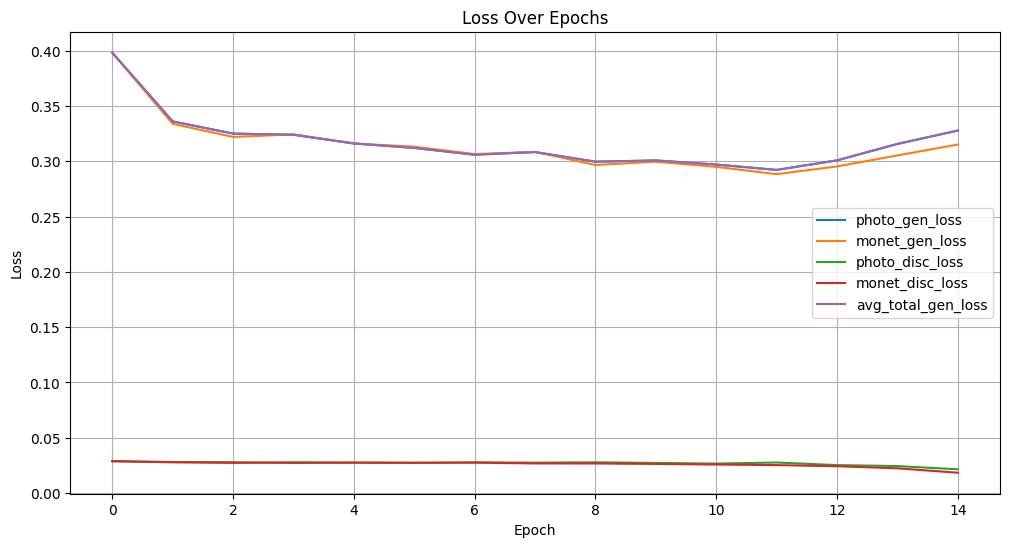

In [16]:
import matplotlib.pyplot as plt

# plot loss over training epoch
plt.figure(figsize=(12, 6))

for k, v in history.items():
    plt.plot(v, label=k)

plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## XII. Conclusion ##

The requirement of this competition is to apply a Generative Adversarial Network (GAN) to generate artwork resembling Monet's paintings.
In this project, I have chosen CycleGAN (Generative Adversial Network) for this competition.
- Benefit of CycleGAN is that it ensures the generated image not only carries Monet's impressionistic style but also looks realistic.
- CycleGAN is a dual DCGAN design (Deep Convolution GAN) to deploy two generators and two discriminators.
- This bi-directional setup will enable translation between domains: A-> B and B -> A.
- Key Components of CycleGAN are to deploy two generators and two discriminators in the setup.
  - Two Generators:
      - G: X -> Y (e.g., Photo → Monet)
      - F: Y -> X (e.g., Monet → Photo)
  - Two Discriminators:
      - D_Y distinguish real Y from fake Y (G(X)) (e.g. real Monet)
      - D_X distinguish real X from fake X (F(Y)) (e.g. real Photo)
  - By applying a cycle-consistency constraint, it ensures the generated image not only carries Monet's impressionistic style but also looks realistic.

### What improve the performance of the model ###
- Best hyper-perimeter for the competition:
  - Image size=256 x256
  - Buffer size=1 (No batch normalization)
  - Early stopping with 3 patienc value. 
  - lambda cycle=10
- A lambda_cycle value of 10.0 provides a good balance between style transfer and content preservation in the CycleGAN model.
- Cycle-consistency loss enhances content preservation in generated Monet-style images by ensuring that the mappings between photos and paintings are reversible.
- This helps reduce the MiFID (Memorization-informed Fréchet Inception Distance) score by maintaining content fidelity, aligning the generated images closely with the target Monet style.

### What didn't improve the performance of the model ###
- Insufficient Training Duration:
  - Training for only 10 epochs, as in the provided code, does not sufficiently reduce the generator and discriminator losses.
  - Under-training leads to poor style transfer and higher MiFID scores.
- Over-training:
  - On the other extermem, long training time might lead not reduce learning loss because model might have memorize the training dataset.

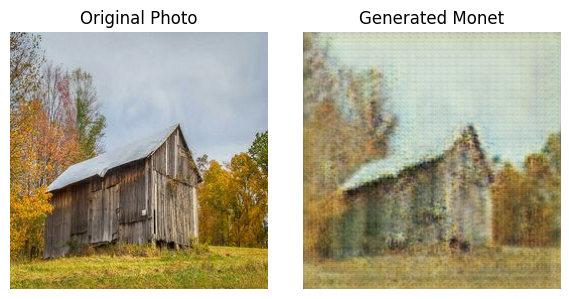

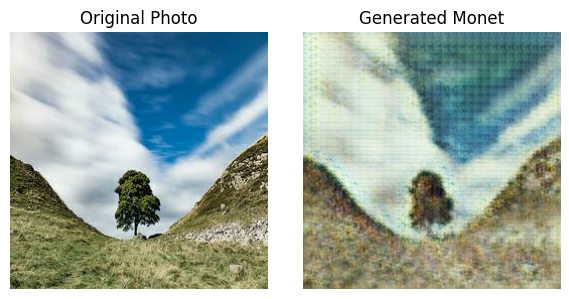

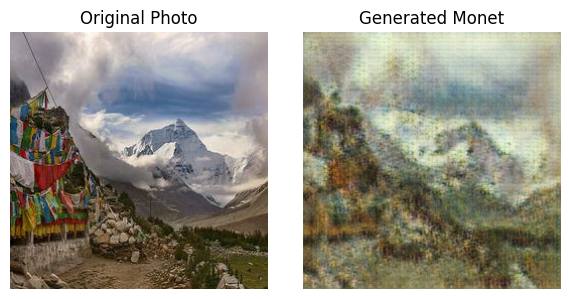

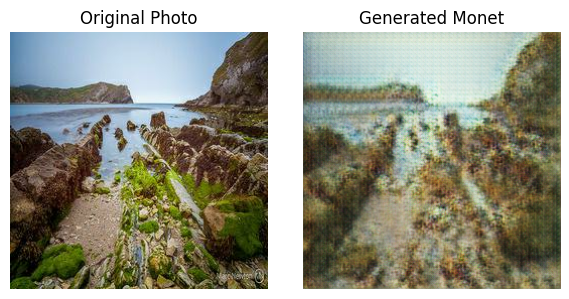

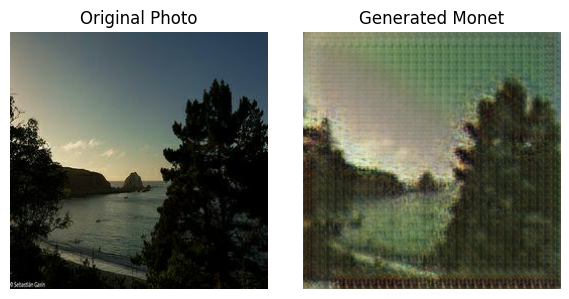

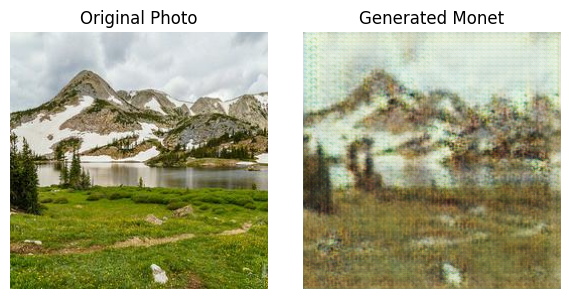

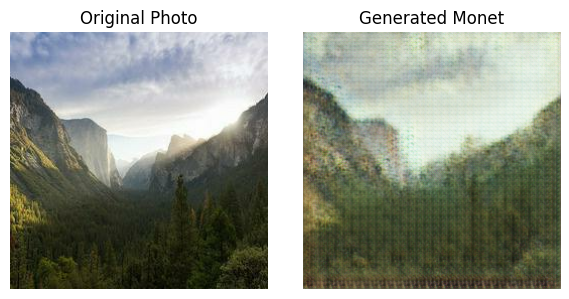

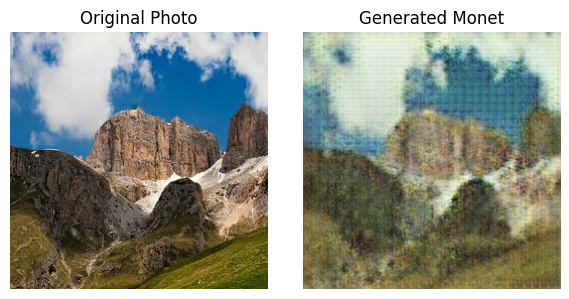

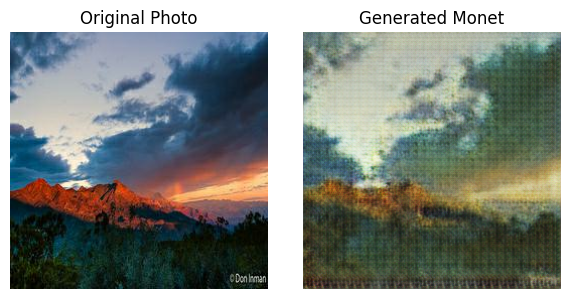

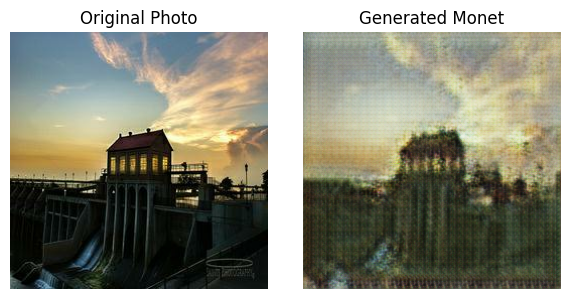

In [17]:
# Randomly pick 5 generated images, and display generated images side by side with original photos
FINAL_OUTPUT_DIR = "../final_generated_images"

i = 1
for photo in photo_dataset.unbatch().take(10):
    input_img = tf.expand_dims(photo, axis=0)  
    generated = model.gen_photo_to_monet(input_img, training=False)[0]
    
    original_img = (photo.numpy() * 127.5 + 127.5).astype(np.uint8)
    generated_img = (generated.numpy() * 127.5 + 127.5).astype(np.uint8)
    PIL.Image.fromarray(generated_img).save(os.path.join(FINAL_OUTPUT_DIR, f"{i}.jpg"))
    
    # Display images side by side
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Photo")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(generated_img)
    plt.title("Generated Monet")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    i += 1

## XIII. Future Works and References ##
- Experiment with Diffsion GAN to leverage strength of Transfer and GAN: [https://ieeexplore.ieee.org/document/10678380](https://ieeexplore.ieee.org/document/10678380)
- Experiment with Vision Transformer: [https://paperswithcode.com/method/vision-transformer](https://paperswithcode.com/method/vision-transformer)

### References ###
- Ref: TensorFlow CycleGAN [https://www.tensorflow.org/tutorials/generative/cyclegan](https://www.tensorflow.org/tutorials/generative/cyclegan) 
